In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Initialize database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Inspect database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
engine.execute('SELECT * FROM measurement LIMIT 30').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [9]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
# reflect an existing database into a new model

# Set the Base to the automap_base() sqlalchemy class
Base = automap_base()

# use `.prepare()` to reflect the Python classes from the tables found in the {engine}
Base.prepare(engine, reflect=True)


In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Find last date in database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [16]:
# Calculate the date 1 year ago from the last date in database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [17]:
# Perform a query to retrieve the data and precipitation scores
precipitation_query = (
    session.query(Measurement.date, Measurement.prcp).
    filter(Measurement.date >= dt.date(2016, 8, 23)).
    filter(Measurement.date <= dt.date(2017, 8, 23)).
    order_by(Measurement.date).all()
)


In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_query, columns=['Date', 'Precipitation'])
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


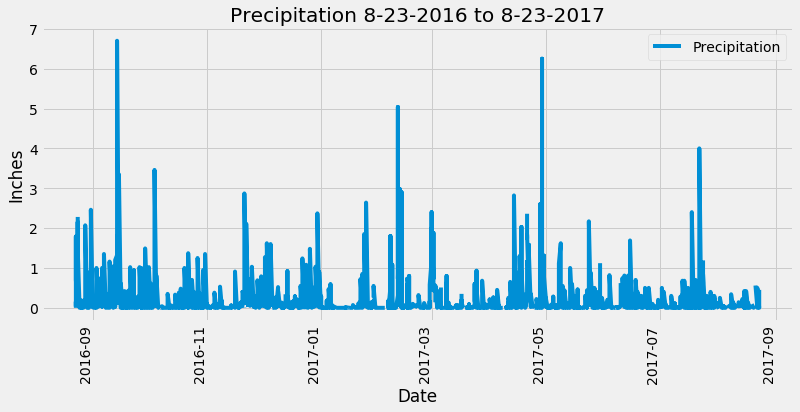

In [19]:
# Plot results using DataFrame plot method
precipitation_df.plot(kind = 'line', figsize=(12, 6),
                      use_index=True, title='Precipitation 8-23-2016 to 8-23-2017', 
                      grid = True, legend=True, rot = 90)

plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig('Resources/prcp_line.png')
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
print(f"There are {station_count} stations in this dataset.")

There are 9 stations in this dataset.


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_st_name = (session.query(Station.name).filter(Measurement.station == Station.station).
    group_by(Station.name).order_by(func.count().desc()).all())

print(f"The most active stations are {active_st_name[0]}, {active_st_name[1]}, and {active_st_name[2]}.")


The most active stations are ('WAIHEE 837.5, HI US',), ('WAIKIKI 717.2, HI US',), and ('KANEOHE 838.1, HI US',).


In [23]:
# List the stations and the counts in descending order.
active_st_count = (session.query(Station.name, func.count()).filter(Measurement.station == Station.station).
    group_by(Station.name).order_by(func.count().desc()).all())
active_st_count

[('WAIHEE 837.5, HI US', 2772),
 ('WAIKIKI 717.2, HI US', 2724),
 ('KANEOHE 838.1, HI US', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('PEARL CITY, HI US', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest_temp = session.query(Station.id, Station.name, func.min(Measurement.tobs)).all()
lowest_temp

[(1, 'WAIKIKI 717.2, HI US', 53.0)]

In [25]:
# Using the station id from the previous query, calculate the highest temperature recorded
highest_temp = session.query(Station.id, Station.name, func.max(Measurement.tobs)).all()
highest_temp

[(1, 'WAIKIKI 717.2, HI US', 87.0)]

In [26]:
# Using the station id from the previous query, 
#calculate the average temperature of the most active station
avg_temp = (session.query(Station.id, Station.name, func.avg(Measurement.tobs)).
            group_by(Station.name).filter(Station.name == 'WAIHEE 837.5, HI US').all())
avg_temp


[(7, 'WAIHEE 837.5, HI US', 73.09795396419437)]

In [27]:
# Choose the station with the highest number of temperature observations.
st_temp_count = (session.query(Station.name, func.count(Measurement.tobs)).filter(Measurement.station == Station.station).
                 filter(Measurement.tobs != 'None').group_by(Station.name).order_by(func.count().desc()).all()
                )
print(f"The station with the highest number of temperature observations is {st_temp_count[0]}.")

The station with the highest number of temperature observations is ('WAIHEE 837.5, HI US', 2772).


In [28]:
# Query the last 12 months of temperature observation data for this station 
temperature_query = (session.query(Measurement.date, Measurement.tobs).   
    filter(Measurement.date >= dt.date(2016, 8, 23)).
    filter(Measurement.date <= dt.date(2017, 8, 23)).
    filter(Station.name == 'WAIHEE 837.5, HI US').
    order_by(Measurement.date).all()
)



In [29]:
# Create dataframe from query results
temperature_df = pd.DataFrame(temperature_query, columns=['Date', 'Temperature'])
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])
temperature_df.set_index('Date', inplace=True)
temperature_df

,Temperature
Date,
2016-08-23,81.0
2016-08-23,76.0
2016-08-23,80.0
2016-08-23,80.0
2016-08-23,80.0
...,...
2017-08-22,76.0
2017-08-23,81.0
2017-08-23,82.0


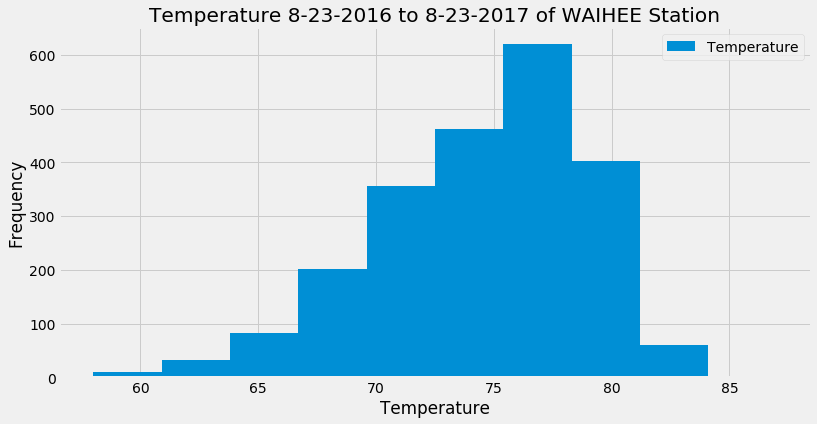

In [30]:
# Plot the results as a histogram
temperature_df.plot(kind='hist', figsize=(12, 6), use_index=True, 
                    title='Temperature 8-23-2016 to 8-23-2017 of WAIHEE Station', grid = True, legend=True)
plt.xlabel('Temperature')
plt.savefig('Resources/temp_hist.png')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
